In [1]:
# %config InlineBackend.figure_format='retina'

# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = mpl.colormaps['viridis_r']


In [6]:
df = pd.read_csv("../equilibrium_atmosphere_GR.csv",sep=',',header=0)

C_to_H = (12.0/1.0) * 10**(8.43 - 12.0)

# Parse data...
result = {}
#    Results
result["H2O_bar"]           = df['H2O'].values
result["CO2_bar"]           = df['CO2'].values
result["N2_bar"]            = df['N2'].values
result["H2_bar"]            = df['H2'].values
result["CO_bar"]            = df['CO'].values
result["CH4_bar"]           = df['CH4'].values
result["tot_bar"]           = df['tot'].values
#    Parameters
result["H_ppm"]             = df['Hydrogen_ppm'].values
result["N_ppm"]             = df['Nitrogen_ppm'].values
result["CH_ratio"]          = df['CH_ratio'].values / C_to_H
result["Mantle_kg"]         = df['mantle_mass'].values
result["fO2-IW"]            = df['fO2_shift'].values
result["Tsurf"]             = df['temperature'].values
planet_mass                 = df['planetary_mass'].values[0]
planet_radius               = df['planetary_radius'].values[0]

#    Derived parameters
result["Mantle_pl"]         = result["Mantle_kg"]/df['planetary_mass'].values[0]

num_rows        = len(df['Hydrogen_ppm'].values)
print("Number of rows:",num_rows)

labels = {
    "H_ppm"     :"Hydrogen mass fraction [ppmw]",
    "N_ppm"     :"Nitrogen mass fraction [ppmw]",
    "tot_bar"   :"Total pressure [bar]",
    "H2O_bar"   :"H2O partial pressure [bar]",
    "CO2_bar"   :"CO2 partial pressure [bar]",
    "N2_bar"    :"N2 partial pressure [bar]",
    "H2_bar"    :"H2 partial pressure [bar]",
    "CO_bar"    :"CO partial pressure [bar]",
    "CH4_bar"   :"CH4 partial pressure [bar]",
    "CH_ratio"  :"C/H mass ratio",
    "Mantle_pl" :"Mantle mass / Planet mass",
    "Mantle_kg" :"Mantle mass [kg]",
    "fO2-IW"    :"log fO2 relative to IW",
    "Tsurf"     :"Temperature [K]",
}

logvars = ['Mantle_kg', 'Mantle_pl', 'CH_ratio', 'H_ppm', 'tot_bar', 'CO_bar', 'H2O_bar', 'CH4_bar', 'N2_bar']



Number of rows: 1600


In [29]:
def make_plot(x,y,z,control):
    x_plt = []
    y_plt = []
    z_plt = []

    for i in range(num_rows):
        
        # Check if case matches control variables
        skiprow = False
        for k in control.keys():
            if (k == x) or (k == y) or (k == z):
                raise Exception("(In)dependent variables cannot also be control variables")
            
            if k in result.keys():
                if abs(result[k][i] - control[k]) < 1.0e-9 :
                    skiprow = True
                    break
        
        # Allowed case
        if not skiprow:
            x_plt.append(result[x][i])
            y_plt.append(result[y][i])
            z_plt.append(result[z][i])

    fig,ax = plt.subplots(figsize=(5,4.5))

    if x in logvars:
        ax.set_xscale("log")
    if y in logvars:
        ax.set_yscale("log")

    logz = bool(z in logvars)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    vmin = np.amin(z_plt)
    vmax = np.amax(z_plt)
    if logz:
        norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    im = ax.scatter(x_plt,y_plt,c=z_plt,s=250,alpha=0.9,edgecolors='none', marker='s',cmap=cmap, norm=norm)

    cbar = fig.colorbar(sm, cax=cax, orientation='vertical') 
    cbar.ax.set_ylabel(labels[z])

    if (not logz) and (vmax > 1.0):
        ticks_new = np.linspace(vmin, vmax, 5)
        cbar.ax.set_yticks([round(tv,1) for tv in ticks_new])

    ax.set_xlabel(labels[x])
    ax.set_ylabel(labels[y])

    plt.show()
    # fig.savefig("gr.png",dpi=210,bbox_inches='tight')

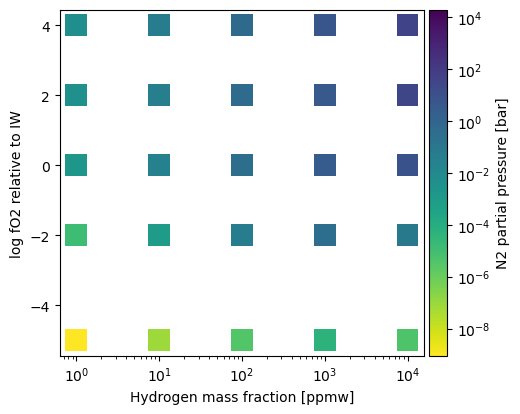

In [38]:
# Independent variables...
x = "H_ppm"
y = "fO2-IW"

# Dependent variables...
z = "N2_bar"

# Control variables...
control = {
    # "H_ppm"      : 1.0,
    "CH_ratio"   : 0.1,
    # "fO2-IW"     : -5.0,
    "Mantle_pl"  : 0.001,
    "Tsurf"      : 1500.0,
}

make_plot(x,y,z,control)
